385.3091654923541 -1.3869344875257976


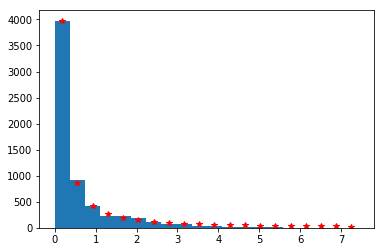

In [3]:
fp=open('Alice.txt','r',encoding='UTF-8')
line=fp.readline()
count=dict()
while line:
   
    line=fp.readline()
    s=line.split()
    for word in s:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

import matplotlib.pyplot as plt
import numpy as np
num=[]
for key in count:
    num.append(count[key])

num.sort()
num.reverse()
lognum=np.log(num)
a=plt.hist(lognum,bins=20)


dx=(a[1][1]-a[1][0])
bin_center=np.array(a[1][0:-1])+dx/2


from scipy import optimize
def test_func(x,amp,alpha):
    return amp*x**alpha

params,params_covariance=optimize.curve_fit(test_func,bin_center,a[0])
plt.plot(bin_center,test_func(bin_center,params[0],params[1]),'r*',label='Fitted Function')
print(params[0],params[1])
plt.show()